# Segmenting Cells in Microscopy Image

This notebook aims to segment cells in a provided microscopy image and measure their areas using the watershed algorithm.

## Step 1: Load and Preprocess the Image
First, we load the image and convert it to grayscale if necessary.

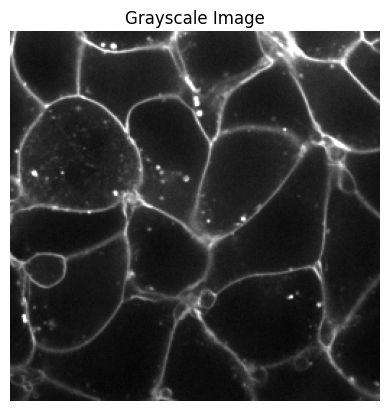

In [1]:
from skimage import io, color
import matplotlib.pyplot as plt

# Load the image
image = io.imread('../data/membranes.png')

# Convert to grayscale if necessary
if len(image.shape) == 3:
    image_gray = color.rgb2gray(image)
else:
    image_gray = image

# Display the original image
plt.imshow(image_gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

## Step 2: Apply the Watershed Algorithm
Next, we compute the local gradient of the image and apply the watershed algorithm.

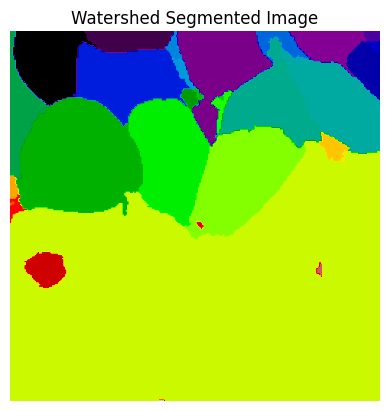

In [2]:
from skimage import filters, morphology, segmentation
from scipy import ndimage as ndi

# Compute the local gradients
gradient = filters.sobel(image_gray)

# Generate markers
markers = ndi.label(image_gray < filters.threshold_otsu(image_gray))[0]

# Apply watershed
labeled_image = segmentation.watershed(gradient, markers)

# Display the watershed result
plt.imshow(labeled_image, cmap='nipy_spectral')
plt.title('Watershed Segmented Image')
plt.axis('off')
plt.show()

## Step 3: Clean and Analyze the Segmented Regions
We remove small objects from the labeled image and measure the remaining objects' areas.

In [3]:
from skimage import measure
import pandas as pd

# Remove small objects
cleaned_image = morphology.remove_small_objects(labeled_image, min_size=150)

# Measure properties of labeled regions
properties = measure.regionprops_table(cleaned_image, properties=['label', 'area'])

df = pd.DataFrame(properties)
df.head()

,label,area
0,1,1952.0
1,2,752.0
2,3,2553.0
3,4,873.0
4,6,586.0


## Step 4: Visualize and Interpret Results
Finally, we visualize the cleaned regions and print out the areas of each segmented cell.

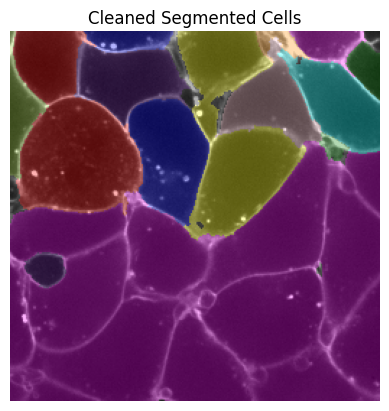

    label     area
0       1   1952.0
1       2    752.0
2       3   2553.0
3       4    873.0
4       6    586.0
5       8   2737.0
6       9    366.0
7      13   2668.0
8      14   2417.0
9      15   1050.0
10     17   5456.0
11     20   3385.0
12     22   3871.0
13     23  35197.0
14     26    223.0
15     32    514.0


In [4]:
from skimage import color

# Display the cleaned image with color labels
plt.imshow(color.label2rgb(cleaned_image, image=image_gray, bg_label=0), cmap='nipy_spectral')
plt.title('Cleaned Segmented Cells')
plt.axis('off')
plt.show()

# Print the areas of the segmented cells
print(df)